# Algoritmo NSGA-II 


## NGSA

Its contribution to GAs mainly lies in how the selection process is done too.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*O0HrabCthxRdXR9nHzPrjQ.png)

![](https://miro.medium.com/v2/resize:fit:720/1*e_mLv5dpuQHAmfetxsdzew.gif)
Fuente de la imagen: https://medium.com/@hador0208/multi-objective-optimization-no-preference-methods-ex-vega-and-nsga-9110d94e0c29

### Problemas

1. High computational complexity of nondominated sorting.

2. Lack of elitism.

3. Need for specifying the sharing parameter $\sigma_{share}$.


## NGSA-II

![](https://raw.githubusercontent.com/igomezv/ComputoEvolutivo/main/img/NSGAII.png)

![](https://i0.wp.com/oklahomaanalytics.com/wp-content/uploads/2017/10/fig4.png)

![](https://raw.githubusercontent.com/igomezv/ComputoEvolutivo/main/img/crowding.png)

Fuente de las figuras: Deb, K. (2011). Multi-objective optimisation using evolutionary algorithms: an introduction (pp. 3-34). Springer London. 

| Step | Description |
| ---- | ----------- |
| **1. Initialization** | Generate an initial population of size `N` and evaluate the population. |
| **2. Fast Non-Dominated Sort** | Rank the population based on non-domination. Solutions that are not dominated by any other are given a rank of 1, solutions that are only dominated by solutions of rank 1 are given a rank of 2, and so on. |
| **3. Crowding Distance Assignment** | For each front obtained from the previous step, calculate the crowding distance of each solution. This gives a measure of the density of solutions surrounding a particular solution in the population. |
| **4. Selection** | Use binary tournament selection, based on rank and crowding distance, to select the parents for the next generation. Solutions with lower rank are preferred, and if two solutions have the same rank, the one with the larger crowding distance is preferred. |
| **5. Crossover and Mutation** | Apply genetic operators to the parents to generate offspring. The crossover operator is used to combine the genetic information of two parents and produce offspring, while the mutation operator is used to introduce variability in the offspring by randomly altering their genetic information. |
| **6. Combine and Evaluate** | Combine the parent and offspring populations. Evaluate the combined population. |
| **7. Fast Non-Dominated Sort (again)** | Perform non-dominated sorting on the combined population. |
| **8. Crowding Distance Assignment (again)** | Assign crowding distances to the individuals in each front of the combined population. |
| **9. Selection for Next Generation** | Fill the next generation with individuals from the various fronts of the combined population, starting with the first front (rank 1). If the size of the next generation is reached before a front is completely included, use crowding distance to select the remaining individuals from that front. |
| **10. Loop or Terminate** | Repeat steps 4 to 9 until the stopping criterion is met. This could be a maximum number of generations, a maximum allowed computation time, or a desired quality of solution. |



## selNSGA2 en DEAP

In [4]:
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [6]:
toolbox = base.Toolbox()

toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", lambda ind: (ind[0]**2, (ind[0]-2)**2))
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=0.0, up=1.0, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.0, up=1.0, eta=20.0, indpb=1.0)
toolbox.register("select", tools.selNSGA2)

pop_size = 100
num_gen = 100

pop = toolbox.population(n=pop_size)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

algorithms.eaMuPlusLambda(pop, toolbox, mu=pop_size, lambda_=pop_size, cxpb=0.5, mutpb=0.5, ngen=num_gen, 
                          stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg                    	std                    	min                            	max                    
0  	100   	[0.28663268 2.45557018]	[0.2761943  0.84652435]	[6.85263824e-05 1.05673062e+00]	[0.94483448 3.96695626]
1  	100   	[0.34536523 2.28545298]	[0.29689819 0.84768874]	[1.35688711e-05 1.05673062e+00]	[0.94483448 3.98527919]
2  	100   	[0.35040383 2.27918436]	[0.29416681 0.86631973]	[1.35688711e-05 1.02177586e+00]	[0.97845868 3.98527919]
3  	100   	[0.4086059 2.1414803]  	[0.31433198 0.88102744]	[1.35688711e-05 1.00092222e+00]	[0.99907821 3.98527919]
4  	100   	[0.37554284 2.19760033]	[0.30146741 0.83629299]	[1.35688711e-05 1.00092222e+00]	[0.99907821 3.98527919]
5  	100   	[0.37036905 2.23278664]	[0.30534492 0.87265338]	[1.35688711e-05 1.00005345e+00]	[0.99994655 3.98527919]
6  	100   	[0.38746992 2.18286985]	[0.31651239 0.85393344]	[1.35688711e-05 1.00005345e+00]	[0.99994655 3.98527919]
7  	100   	[0.38128235 2.20488903]	[0.30784209 0.87297419]	[1.35688711e-05 1.000

71 	100   	[0.43154377 2.08467455]	[0.32668144 0.86841349]	[4.93038066e-32 1.00000000e+00]	[1. 4.]                
72 	100   	[0.39461879 2.1459768 ]	[0.30478347 0.82828434]	[4.93038066e-32 1.00000000e+00]	[1. 4.]                
73 	100   	[0.39089647 2.16655088]	[0.31136697 0.84448843]	[4.93038066e-32 1.00000000e+00]	[1. 4.]                
74 	100   	[0.38593955 2.19568555]	[0.30934588 0.87727437]	[4.93038066e-32 1.00000000e+00]	[1. 4.]                
75 	100   	[0.41800408 2.09864631]	[0.31226369 0.84487791]	[4.93038066e-32 1.00000000e+00]	[1. 4.]                
76 	100   	[0.36350011 2.23474943]	[0.304416   0.84215282]	[1.23259516e-32 1.00000000e+00]	[1. 4.]                
77 	100   	[0.35839479 2.28437515]	[0.31736454 0.89344806]	[1.23259516e-32 1.00000000e+00]	[1. 4.]                
78 	100   	[0.39602404 2.16013062]	[0.31213481 0.85654935]	[1.23259516e-32 1.00000000e+00]	[1. 4.]                
79 	100   	[0.37505285 2.19769325]	[0.30144065 0.83530183]	[1.23259516e-32 1.000

([[0.0],
  [0.0],
  [0.9999999999999999],
  [0.7051599072346912],
  [0.28544678533507956],
  [0.40015786809991727],
  [0.130507992908247],
  [0.22556062136272492],
  [0.3074754354884514],
  [0.7489930394895232],
  [0.0922601384642987],
  [0.1026377898770221],
  [0.06286329134743951],
  [0.319429861337204],
  [0.20069388219660628],
  [0.5302799404549193],
  [0.8864220279370084],
  [0.6720642107477017],
  [0.5173279862037344],
  [0.17925261276230142],
  [0.8593560548239441],
  [0.9521624547461575],
  [0.7750107335732098],
  [0.7388633630475329],
  [0.942939720746409],
  [0.33661880416618173],
  [0.7636329783905259],
  [0.6162688594413845],
  [0.44359641426734486],
  [0.19405849940223008],
  [0.48700557253344917],
  [0.5836705899488764],
  [0.7306229103930095],
  [0.5950613135102858],
  [0.894887158440402],
  [0.8032045043012702],
  [0.6720642107477017],
  [0.7169276238194808],
  [0.4307099351691419],
  [0.5566368015816586],
  [0.8122187040547942],
  [0.8501783267292544],
  [0.91502859816

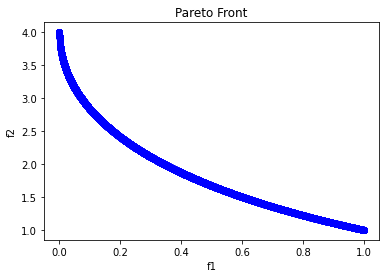

In [7]:
# Extract the fitness of the best individuals (i.e., those in the Pareto front)
pareto_front = [toolbox.evaluate(ind) for ind in hof]

# Separate the two objectives (f1 and f2) into separate lists
f1_values = [obj[0] for obj in pareto_front]
f2_values = [obj[1] for obj in pareto_front]

# Plot the Pareto front
plt.scatter(f1_values, f2_values, color='b')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Pareto Front')
plt.show()

## Ejercicio: optimizar otro par de funciones y graficar frente de Pareto.

### ¿A qué se refiere *eaMuPlusLambda*? Ver siguiente notebook, relacionada a estrategias evolutivas.